In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")


In [ ]:
import os
project_path = "/content/drive/MyDrive/Intro_DS_Final"
data_path = project_path + "/data"
csv_path = data_path + "/application_train.csv"


In [ ]:
data_path = "/content/drive/MyDrive/Intro_DS_Final/data/application_train.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Preview & inspect
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Clean Days employed column
# 365243 was a placeholder for unemployed, so we just made it null instead
df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].replace(365243, np.nan)
df["EMPLOYED_YEARS"] = (-df["DAYS_EMPLOYED"]) / 365
df["EMPLOYED_YEARS"] = df["EMPLOYED_YEARS"].round(1)

df[["DAYS_EMPLOYED", "EMPLOYED_YEARS"]].head()

,DAYS_EMPLOYED,EMPLOYED_YEARS
0,-637.0,1.7
1,-1188.0,3.3
2,-225.0,0.6
3,-3039.0,8.3
4,-3038.0,8.3


In [ ]:
# Clean Days Born

df["AGE_YEARS"] = (-df["DAYS_BIRTH"]) / 365
df["AGE_YEARS"] = df["AGE_YEARS"].round(1)

df[["DAYS_BIRTH", "AGE_YEARS"]].head()


,DAYS_BIRTH,AGE_YEARS
0,-9461,25.9
1,-16765,45.9
2,-19046,52.2
3,-19005,52.1
4,-19932,54.6


In [ ]:
# Clean how long people have been living at their address

df["REGISTRATION_YEARS"] = (-df["DAYS_REGISTRATION"]) / 365
df["REGISTRATION_YEARS"] = df["REGISTRATION_YEARS"].round(1)

df[["DAYS_REGISTRATION", "REGISTRATION_YEARS"]].head()


,DAYS_REGISTRATION,REGISTRATION_YEARS
0,-3648.0,10.0
1,-1186.0,3.2
2,-4260.0,11.7
3,-9833.0,26.9
4,-4311.0,11.8


In [ ]:
df["ID_DOC_YEARS"] = (-df["DAYS_ID_PUBLISH"]) / 365
df["ID_DOC_YEARS"] = df["ID_DOC_YEARS"].round(1)

df["PHONE_CHANGE_YEARS"] = (-df["DAYS_LAST_PHONE_CHANGE"]) / 365
df["PHONE_CHANGE_YEARS"] = df["PHONE_CHANGE_YEARS"].round(1)


In [ ]:
important_cols = [
    "TARGET",

    "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
    "CNT_CHILDREN", "CNT_FAM_MEMBERS",

    "AGE_YEARS", "EMPLOYED_YEARS", "REGISTRATION_YEARS",
    "ID_DOC_YEARS", "PHONE_CHANGE_YEARS",

    "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",

    "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_REALTY", "FLAG_OWN_CAR",
    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE", "ORGANIZATION_TYPE",

    "REGION_POPULATION_RELATIVE",
    "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
    "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION",
    "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",

    "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"
]

df_selected = df[important_cols].copy()
df_selected.head()


,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE_YEARS,EMPLOYED_YEARS,REGISTRATION_YEARS,ID_DOC_YEARS,PHONE_CHANGE_YEARS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,1,202500.0,406597.5,24700.5,351000.0,0,1.0,25.9,1.7,10.0,5.8,3.1,0.083037,0.262949,0.139376,Cash loans,M,Y,N,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,0.018801,2,2,0,0,0,0,0,1,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0,2.0,45.9,3.3,3.2,0.8,2.3,0.311267,0.622246,NaN,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,School,0.003541,1,1,0,0,0,0,0,1,0
2,0,67500.0,135000.0,6750.0,135000.0,0,1.0,52.2,0.6,11.7,6.9,2.2,NaN,0.555912,0.729567,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Government,0.010032,2,2,0,0,0,0,1,1,0
3,0,135000.0,312682.5,29686.5,297000.0,0,2.0,52.1,8.3,26.9,6.7,1.7,NaN,0.650442,NaN,Cash loans,F,Y,N,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,0.008019,2,2,0,0,0,0,0,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0,1.0,54.6,8.3,11.8,9.5,3.0,NaN,0.322738,NaN,Cash loans,M,Y,N,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,0.028663,2,2,1,0,0,0,0,0,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = [
  'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
  'CNT_CHILDREN','CNT_FAM_MEMBERS','AGE_YEARS','EMPLOYED_YEARS',
  'REGISTRATION_YEARS','ID_DOC_YEARS','PHONE_CHANGE_YEARS',
  'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
  'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY',
  'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION','FLAG_WORK_PHONE',
  'FLAG_PHONE','FLAG_EMAIL'
]

cat_cols = [
  'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','FLAG_OWN_CAR',
  'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE','ORGANIZATION_TYPE'
]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [ ]:
X = df_selected.drop(columns=["TARGET"])
X_processed = preprocessor.fit_transform(X)

numeric_feature_names = num_cols

categorical_feature_names = (
    preprocessor.named_transformers_["cat"]
        .named_steps["encoder"]
        .get_feature_names_out(cat_cols)
)

all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

df_processed = pd.DataFrame(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
    columns=all_feature_names
)

df_processed.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE_YEARS,EMPLOYED_YEARS,REGISTRATION_YEARS,ID_DOC_YEARS,PHONE_CHANGE_YEARS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0.142129,-0.478095,-0.166143,-0.507236,-0.577538,-1.265722,-1.508606,-0.762974,-0.379256,-0.581106,0.204051,-3.021877,-1.317940,-2.153651,-0.149452,-0.103064,-0.062699,-0.547236,-0.124004,-0.231267,-0.205869,-0.499013,1.599337,-0.245215,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.426792,1.725450,0.592683,1.600873,-0.577538,-0.167638,0.164185,-0.489630,-1.083778,-1.790097,-0.149046,-1.384737,0.564482,0.112063,-1.252750,-2.067573,-2.051813,-0

# Logistic Regression Baseline

=== Logistic Regression Performance (Threshold = 0.5) ===
Accuracy:  0.6858
Precision: 0.1593
Recall:    0.6758
F1 Score:  0.2578
ROC-AUC:   0.7452


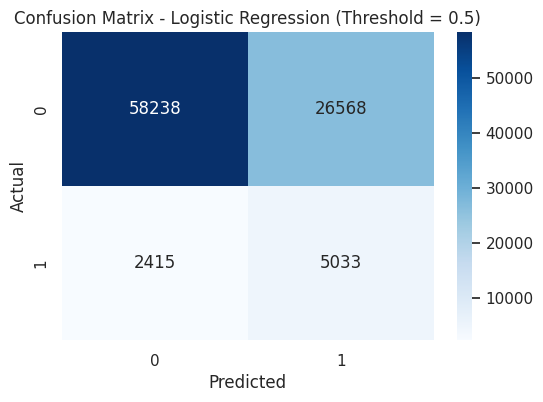

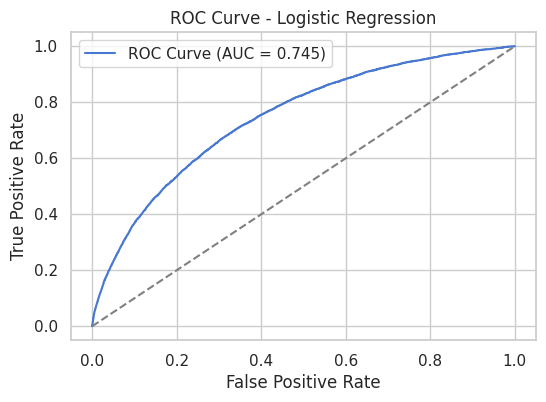

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns


X = df_processed
y = df_selected['TARGET']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

log_reg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced'
)


log_reg.fit(X_train, y_train)


y_prob = log_reg.predict_proba(X_test)[:, 1]

custom_threshold = 0.5
y_pred = (y_prob >= custom_threshold).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"=== Logistic Regression Performance (Threshold = {custom_threshold}) ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Logistic Regression (Threshold = {custom_threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

## Implement Random Forest Model



Best Threshold for F1-score (Random Forest): 0.5556
Maximized F1-score (Random Forest): 0.2822

=== Random Forest Performance (Threshold = 0.5556) ===
Accuracy:  0.8080
Precision: 0.2021
Recall:    0.4674
F1 Score:  0.2822
ROC-AUC:   0.7395


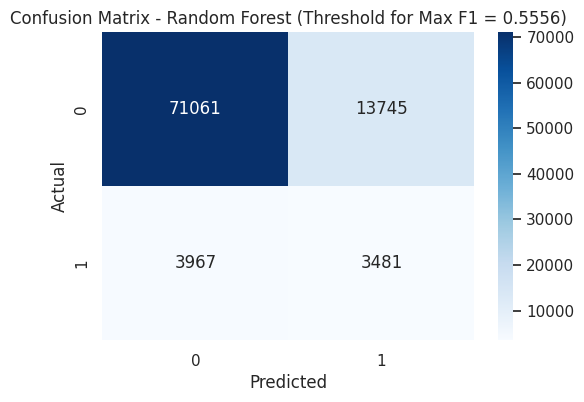

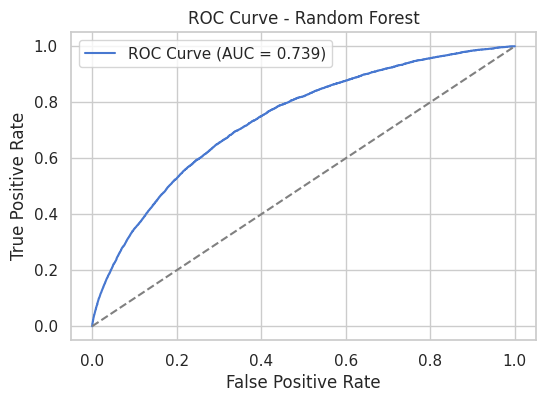

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)
best_f1_rf = 0
best_threshold_f1_rf = 0.5

for t in thresholds:
    y_pred_rf_t = (y_prob_rf >= t).astype(int)
    current_f1_rf = f1_score(y_test, y_pred_rf_t)
    if current_f1_rf > best_f1_rf:
        best_f1_rf = current_f1_rf
        best_threshold_f1_rf = t

print(f"Best Threshold for F1-score (Random Forest): {best_threshold_f1_rf:.4f}")
print(f"Maximized F1-score (Random Forest): {best_f1_rf:.4f}")

y_pred_rf_best_f1 = (y_prob_rf >= best_threshold_f1_rf).astype(int)

acc_rf = accuracy_score(y_test, y_pred_rf_best_f1)
prec_rf = precision_score(y_test, y_pred_rf_best_f1)
rec_rf = recall_score(y_test, y_pred_rf_best_f1)
f1_rf = f1_score(y_test, y_pred_rf_best_f1)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\n=== Random Forest Performance (Threshold = {best_threshold_f1_rf:.4f}) ===")
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {auc_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf_best_f1)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Random Forest (Threshold for Max F1 = {best_threshold_f1_rf:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

## Implement XGBoost Forest Model



Best Threshold for F1-score: 0.6566
Maximized F1-score: 0.3062

=== XGBoost Performance (Threshold = 0.6566) ===
Accuracy:  0.8481
Precision: 0.2426
Recall:    0.4153
F1 Score:  0.3062
ROC-AUC:   0.7570


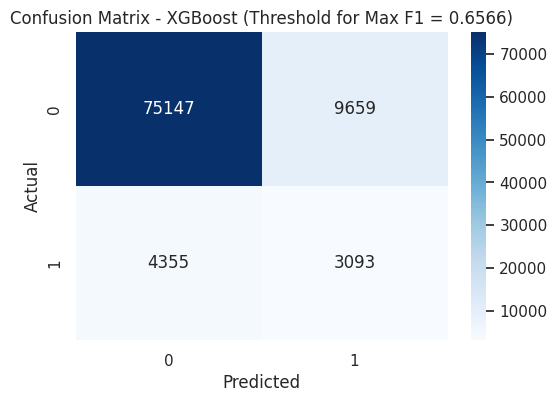

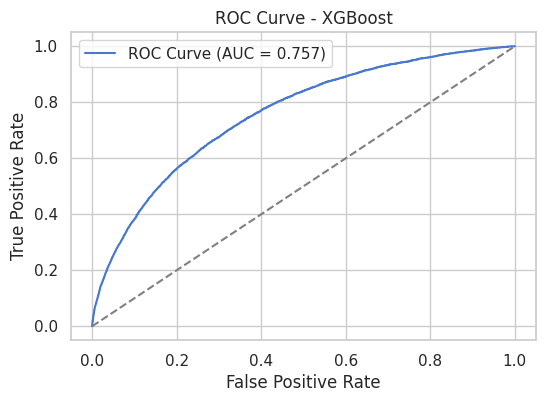

In [ ]:
import xgboost as xgb
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight = neg_count / pos_count

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)
best_f1 = 0
best_threshold_f1 = 0.5

for t in thresholds:
    y_pred_xgb_t = (y_prob_xgb >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred_xgb_t)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold_f1 = t

print(f"Best Threshold for F1-score: {best_threshold_f1:.4f}")
print(f"Maximized F1-score: {best_f1:.4f}")

y_pred_xgb_best_f1 = (y_prob_xgb >= best_threshold_f1).astype(int)

acc_xgb = accuracy_score(y_test, y_pred_xgb_best_f1)
prec_xgb = precision_score(y_test, y_pred_xgb_best_f1)
rec_xgb = recall_score(y_test, y_pred_xgb_best_f1)
f1_xgb = f1_score(y_test, y_pred_xgb_best_f1)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"\n=== XGBoost Performance (Threshold = {best_threshold_f1:.4f}) ===")
print(f"Accuracy:  {acc_xgb:.4f}")
print(f"Precision: {prec_xgb:.4f}")
print(f"Recall:    {rec_xgb:.4f}")
print(f"F1 Score:  {f1_xgb:.4f}")
print(f"ROC-AUC:   {auc_xgb:.4f}")

cm_xgb = confusion_matrix(y_test, y_pred_xgb_best_f1)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - XGBoost (Threshold for Max F1 = {best_threshold_f1:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6,4))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {auc_xgb:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

## Compare Model Performances


In [ ]:
metrics_data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest'],
    'Accuracy': [acc, acc_xgb, acc_rf],
    'Precision': [prec, prec_xgb, prec_rf],
    'Recall': [rec, rec_xgb, rec_rf],
    'F1 Score': [f1, f1_xgb, f1_rf],
    'ROC-AUC': [auc, auc_xgb, auc_rf]
}

df_metrics = pd.DataFrame(metrics_data)

print("\n=== Model Performance Comparison ===")
print(df_metrics.to_markdown(index=False))


=== Model Performance Comparison ===
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression |   0.685835 |    0.159267 | 0.675752 |   0.257779 |  0.745155 |
| XGBoost             |   0.848093 |    0.24255  | 0.415279 |   0.306238 |  0.757011 |
| Random Forest       |   0.808008 |    0.202078 | 0.467374 |   0.282159 |  0.739478 |


### Model Performance Analysis

Let's analyze the performance metrics of the three models:

| Model               | Accuracy   | Precision  | Recall   | F1 Score | ROC-AUC  |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression | 0.6858     | 0.1593     | 0.6758   | 0.2578     | 0.7452   |
| XGBoost             | 0.8481     | 0.2426     | 0.4153   | 0.3062     | 0.7570   |
| Random Forest       | 0.8080     | 0.2021     | 0.4674   | 0.2822     | 0.7395   |

#### Strengths and Weaknesses:

1.  **Logistic Regression (Default Threshold 0.5):**
    *   **Strength**: Achieved the highest recall (0.6758) among the three models with its default threshold. This means it correctly identified a larger proportion of actual defaulters. It also has a competitive ROC-AUC (0.7452).
    *   **Weakness**: Suffered from very low precision (0.1593) and the lowest F1-score (0.2578). This implies that a large number of applicants predicted as defaulters by this model were actually not defaulters (many false positives). Its accuracy is also the lowest.

2.  **XGBoost (F1-score optimized threshold 0.6566):**
    *   **Strength**: Achieved the highest F1-score (0.3062) and ROC-AUC (0.7570). It also has the highest accuracy (0.8481) and precision (0.2426). The high F1-score indicates a good balance between precision and recall, which is often desirable in imbalanced classification problems. The highest ROC-AUC suggests superior overall discriminative power.
    *   **Weakness**: Recall (0.4153) is lower than Logistic Regression, meaning it missed more actual defaulters compared to Logistic Regression. However, this is a trade-off for its significantly higher precision.

3.  **Random Forest (F1-score optimized threshold 0.5556):**
    *   **Strength**: Showed a balanced performance between Logistic Regression and XGBoost. It achieved a higher recall (0.4674) than XGBoost and better precision (0.2021) and F1-score (0.2822) than Logistic Regression. Its accuracy (0.8080) is also good.
    *   **Weakness**: The ROC-AUC (0.7395) is slightly lower than the other two models, indicating slightly less overall discriminative ability. While better than Logistic Regression, its precision is still relatively low compared to XGBoost.

#### Implications of F1-score Optimization:

*   **XGBoost** and **Random Forest** were optimized for F1-score by adjusting the classification threshold. This process aims to find a balance between correctly identifying positive cases (recall) and avoiding false positives (precision). For XGBoost, this resulted in a higher threshold (0.6566), which traded some recall for better precision, leading to the highest F1-score and the best balance. For Random Forest, a threshold of 0.5556 also improved its F1-score compared to what a default 0.5 would likely yield, indicating a similar trade-off.
*   **Logistic Regression**, using a default 0.5 threshold, prioritized recall (as seen by its high recall and low precision), which is not necessarily F1-score optimized.

#### Trade-offs between Precision and Recall for Mortgage Default Prediction:

*   **High Recall (Logistic Regression)**: A high recall means the model is good at catching most of the actual defaulters. In the context of mortgage loans, this is crucial for risk management, as missing a defaulter can lead to significant financial losses. However, the very low precision means it also flags many non-defaulters as potential defaulters, which could lead to denying loans to creditworthy individuals and losing business opportunities. This model might be preferred if the cost of a false negative (missing a defaulter) is very high.
*   **High Precision (XGBoost)**: A higher precision, as seen in XGBoost, means that when the model predicts a default, it's more likely to be correct. This reduces the number of false alarms and could save resources spent on investigating non-risky applicants. However, its lower recall means it will miss a significant number of actual defaulters. This model might be preferred if the cost of a false positive (incorrectly denying a loan) is very high, or if resources for follow-up are limited.
*   **Balanced (XGBoost, Random Forest)**: XGBoost and Random Forest, with F1-score optimization, aim for a better balance. XGBoost particularly stands out with the highest F1-score and ROC-AUC, indicating it provides the best overall predictive power by balancing the identification of defaulters with the accuracy of those predictions. This balance is often ideal as it minimizes both types of errors to an acceptable level.

#### Conclusion:

XGBoost appears to be the best-performing model for this task when F1-score and overall discriminative power (ROC-AUC) are considered. It strikes the best balance between precision and recall, making it suitable for practical application in mortgage default prediction where both identifying defaulters and minimizing false alarms are important. Random Forest also performs well, offering a good compromise. Logistic Regression, while having high recall, suffers from very low precision, making it less ideal unless the business objective is almost exclusively focused on minimizing missed defaulters at any cost.

## Final Task

### Subtask:
Summarize the overall findings from the three models, including their performance, interpretability, and suitability for the mortgage default prediction problem.


## Perform PCA

### Subtask:
Apply Principal Component Analysis (PCA) to the df_processed DataFrame to reduce dimensionality. This will involve importing PCA, fitting it to the data, and transforming the data into a new set of principal components. We will aim to retain components explaining 95% of the variance.


**Reasoning**:
To perform PCA, I will import the PCA class, initialize it with n_components=0.95 to retain 95% variance, fit and transform the df_processed DataFrame, and then create a new DataFrame with appropriately named columns.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

pca.fit(df_processed)

df_pca_transformed = pca.transform(df_processed)

num_components = df_pca_transformed.shape[1]
pca_columns = [f"PC{i+1}" for i in range(num_components)]
df_pca = pd.DataFrame(data = df_pca_transformed, columns = pca_columns)

print(f"Shape of original processed data: {df_processed.shape}")
print(f"Shape of PCA transformed data: {df_pca.shape}")
df_pca.head()

Shape of original processed data: (307511, 116)
Shape of PCA transformed data: (307511, 28)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-1.388259,-1.137220,-0.916398,0.429930,-2.870023,1.083716,-0.656651,0.436465,0.983203,1.290280,-0.761530,-1.464910,0.670758,-1.717847,-0.300265,-0.598500,-1.257972,-0.906373,-0.189217,0.149801,-0.730045,0.675551,-0.533430,0.099002,0.299588,-0.540906,0.415401,-0.340325
1,2.737094,-0.219874,0.029033,-0.350142,-2.032581,0.664140,-0.492843,-0.435915,-0.066055,-0.246818,0.056319,0.199398,-0.905895,-1.482674,0.291353,0.171878,-0.729027,-2.888645,1.135811,0.000204,1.090801,-1.082351,0.780140,-0.518662,0.296575,-0.414253,-0.071616,-0.049033
2,-1.749790,0.950178,-1.501341,0.078864,-0.029890,2.168342,-0.544157,-0.121100,0.793837,-0.229496,-0.178708,1.396694,-1.233886,-0.451586,0.298954,0.287855,0.346446,0.101915,0.673441,1.533606,-0.540019,0.287268,-0.724054,-1.025920,-0.112134,-0.218452,0.077091,1.112674
3,-0.692313,1.353358,-0.305002,0.136952,0.068647,-0.496785,0.346892,-0.531900,-0.715298,-0.022501,0.093495,-0.058043,0.601860,-0.612808,0.665810,0.886821,0.642710,-0.614671,0.063880,-0.037903,-0.543333,0.596806,-0.253461,0.322865,0.461922,0.388753,1.043792,-0.155763
4,-0.473296,0.767355,-0.604353,0.908261,-0.669595,-0.312260,0.016199,-0.940279,0.221713,0.197126,-0.192312,0.164610,0.834077,1.825013,-0.636017,-0.666550,-0.671940,0.202456,0.259830,-0.101578,-0.327023,0.600702,-0.847326,-0.343141,0.433440,-0.823345,-0.039803,0.093089


**Reasoning**:
The previous execution failed because 'df_processed' was not defined in the execution context. Assuming the preceding cells that define 'df_processed' will be run in sequence, the PCA code itself is logically correct as initially provided. Therefore, I will regenerate the same code block to perform PCA on the already processed data.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

pca.fit(df_processed)

df_pca_transformed = pca.transform(df_processed)

num_components = df_pca_transformed.shape[1]
pca_columns = [f"PC{i+1}" for i in range(num_components)]
df_pca = pd.DataFrame(data = df_pca_transformed, columns = pca_columns)

print(f"Shape of original processed data: {df_processed.shape}")
print(f"Shape of PCA transformed data: {df_pca.shape}")
df_pca.head()

Shape of original processed data: (307511, 116)
Shape of PCA transformed data: (307511, 28)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-1.388259,-1.137220,-0.916398,0.429930,-2.870023,1.083716,-0.656651,0.436465,0.983203,1.290280,-0.761530,-1.464910,0.670758,-1.717847,-0.300265,-0.598500,-1.257972,-0.906373,-0.189217,0.149801,-0.730045,0.675551,-0.533430,0.099002,0.299588,-0.540906,0.415401,-0.340325
1,2.737094,-0.219874,0.029033,-0.350142,-2.032581,0.664140,-0.492843,-0.435915,-0.066055,-0.246818,0.056319,0.199398,-0.905895,-1.482674,0.291353,0.171878,-0.729027,-2.888645,1.135811,0.000204,1.090801,-1.082351,0.780140,-0.518662,0.296575,-0.414253,-0.071616,-0.049033
2,-1.749790,0.950178,-1.501341,0.078864,-0.029890,2.168342,-0.544157,-0.121100,0.793837,-0.229496,-0.178708,1.396694,-1.233886,-0.451586,0.298954,0.287855,0.346446,0.101915,0.673441,1.533606,-0.540019,0.287268,-0.724054,-1.025920,-0.112134,-0.218452,0.077091,1.112674
3,-0.692313,1.353358,-0.305002,0.136952,0.068647,-0.496785,0.346892,-0.531900,-0.715298,-0.022501,0.093495,-0.058043,0.601860,-0.612808,0.665810,0.886821,0.642710,-0.614671,0.063880,-0.037903,-0.543333,0.596806,-0.253461,0.322865,0.461922,0.388753,1.043792,-0.155763
4,-0.473296,0.767355,-0.604353,0.908261,-0.669595,-0.312260,0.016199,-0.940279,0.221713,0.197126,-0.192312,0.164610,0.834077,1.825013,-0.636017,-0.666550,-0.671940,0.202456,0.259830,-0.101578,-0.327023,0.600702,-0.847326,-0.343141,0.433440,-0.823345,-0.039803,0.093089


**Reasoning**:
The subtask requires visualizing the explained variance ratio of the PCA components. This can be done by plotting the `explained_variance_ratio_` attribute of the `pca` object.



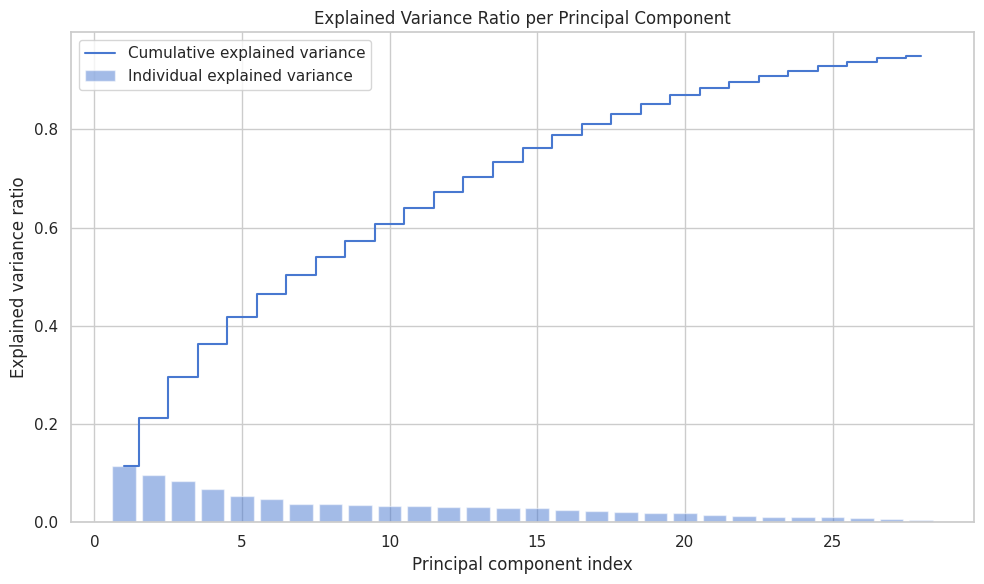

Explained variance ratio for each component and cumulative explained variance plot displayed.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cumsum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, num_components + 1), cumsum_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance Ratio per Principal Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print("Explained variance ratio for each component and cumulative explained variance plot displayed.")

**Reasoning**:
Now that the data has been transformed using PCA, the next step is to re-split the PCA-transformed data (`df_pca`) and the target variable (`y`) into training and testing sets. This is crucial for retraining the models on the new feature space.



In [ ]:
from sklearn.model_selection import train_test_split

X_pca = df_pca
y_pca = y

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.3, random_state=42, stratify=y_pca
)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")
print(f"Shape of y_train_pca: {y_train_pca.shape}")
print(f"Shape of y_test_pca: {y_test_pca.shape}")

Shape of X_train_pca: (215257, 28)
Shape of X_test_pca: (92254, 28)
Shape of y_train_pca: (215257,)
Shape of y_test_pca: (92254,)


**Reasoning**:
I will retrain the Logistic Regression model using the PCA-transformed training data (`X_train_pca`, `y_train_pca`), then make predictions on the PCA-transformed test data (`X_test_pca`), and finally evaluate its performance using accuracy, precision, recall, F1-score, ROC-AUC, and visualize the confusion matrix and ROC curve. This directly addresses the first part of the current subtask.



=== Logistic Regression Performance (PCA data, Threshold = 0.5) ===
Accuracy:  0.6841
Precision: 0.1570
Recall:    0.6670
F1 Score:  0.2542
ROC-AUC:   0.7397


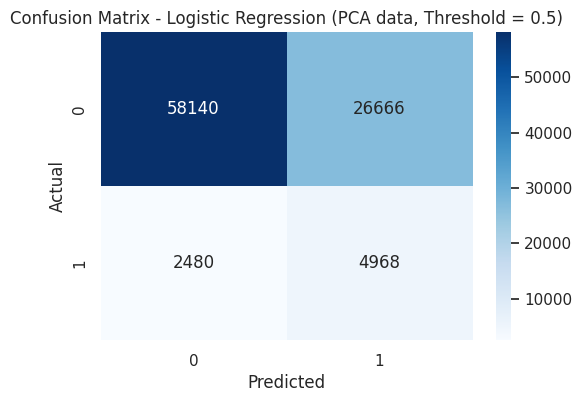

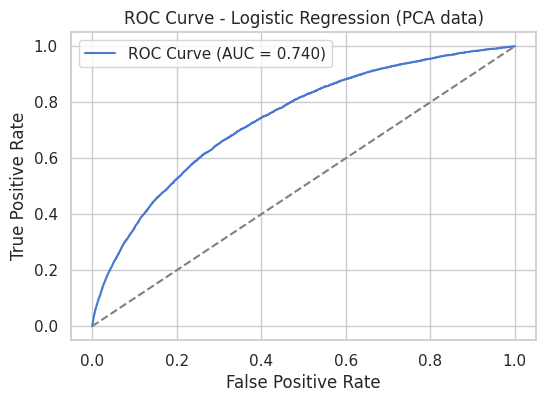

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_reg_pca = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced'
)

log_reg_pca.fit(X_train_pca, y_train_pca)

y_prob_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]

custom_threshold_pca = 0.5
y_pred_pca = (y_prob_pca >= custom_threshold_pca).astype(int)

acc_pca = accuracy_score(y_test_pca, y_pred_pca)
prec_pca = precision_score(y_test_pca, y_pred_pca)
rec_pca = recall_score(y_test_pca, y_pred_pca)
f1_pca = f1_score(y_test_pca, y_pred_pca)
auc_pca = roc_auc_score(y_test_pca, y_prob_pca)

print(f"=== Logistic Regression Performance (PCA data, Threshold = {custom_threshold_pca}) ===")
print(f"Accuracy:  {acc_pca:.4f}")
print(f"Precision: {prec_pca:.4f}")
print(f"Recall:    {rec_pca:.4f}")
print(f"F1 Score:  {f1_pca:.4f}")
print(f"ROC-AUC:   {auc_pca:.4f}")

cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(6,4))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Logistic Regression (PCA data, Threshold = {custom_threshold_pca})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_pca, tpr_pca, _ = roc_curve(y_test_pca, y_prob_pca)
plt.figure(figsize=(6,4))
plt.plot(fpr_pca, tpr_pca, label=f"ROC Curve (AUC = {auc_pca:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (PCA data)")
plt.legend()
plt.show()

**Reasoning**:
Now, I will retrain the Random Forest model using the PCA-transformed training data (`X_train_pca`, `y_train_pca`), predict probabilities on the test set (`X_test_pca`), find the optimal classification threshold that maximizes the F1-score, and then evaluate the model's performance using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC. Finally, I will visualize the results with a confusion matrix and ROC curve.



Best Threshold for F1-score (Random Forest PCA): 0.5657
Maximized F1-score (Random Forest PCA): 0.2782

=== Random Forest Performance (PCA data, Threshold = 0.5657) ===
Accuracy:  0.8314
Precision: 0.2125
Recall:    0.4025
F1 Score:  0.2782
ROC-AUC:   0.7349


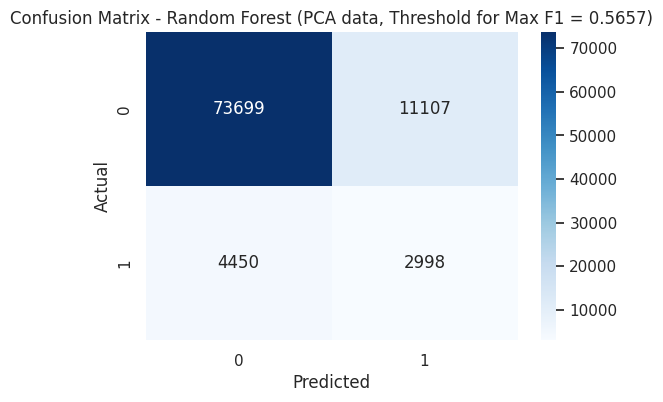

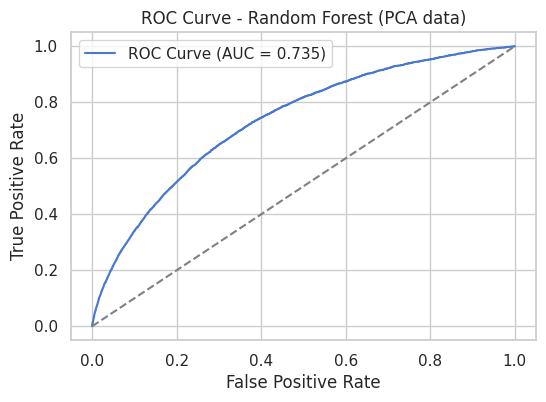

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_pca = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model_pca.fit(X_train_pca, y_train_pca)

y_prob_rf_pca = rf_model_pca.predict_proba(X_test_pca)[:, 1]

thresholds = np.linspace(0, 1, 100)
best_f1_rf_pca = 0
best_threshold_f1_rf_pca = 0.5

for t in thresholds:
    y_pred_rf_t_pca = (y_prob_rf_pca >= t).astype(int)
    current_f1_rf_pca = f1_score(y_test_pca, y_pred_rf_t_pca)
    if current_f1_rf_pca > best_f1_rf_pca:
        best_f1_rf_pca = current_f1_rf_pca
        best_threshold_f1_rf_pca = t

print(f"Best Threshold for F1-score (Random Forest PCA): {best_threshold_f1_rf_pca:.4f}")
print(f"Maximized F1-score (Random Forest PCA): {best_f1_rf_pca:.4f}")

y_pred_rf_best_f1_pca = (y_prob_rf_pca >= best_threshold_f1_rf_pca).astype(int)

acc_rf_pca = accuracy_score(y_test_pca, y_pred_rf_best_f1_pca)
prec_rf_pca = precision_score(y_test_pca, y_pred_rf_best_f1_pca)
rec_rf_pca = recall_score(y_test_pca, y_pred_rf_best_f1_pca)
f1_rf_pca = f1_score(y_test_pca, y_pred_rf_best_f1_pca)
auc_rf_pca = roc_auc_score(y_test_pca, y_prob_rf_pca)

print(f"\n=== Random Forest Performance (PCA data, Threshold = {best_threshold_f1_rf_pca:.4f}) ===")
print(f"Accuracy:  {acc_rf_pca:.4f}")
print(f"Precision: {prec_rf_pca:.4f}")
print(f"Recall:    {rec_rf_pca:.4f}")
print(f"F1 Score:  {f1_rf_pca:.4f}")
print(f"ROC-AUC:   {auc_rf_pca:.4f}")

cm_rf_pca = confusion_matrix(y_test_pca, y_pred_rf_best_f1_pca)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_pca, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Random Forest (PCA data, Threshold for Max F1 = {best_threshold_f1_rf_pca:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_rf_pca, tpr_rf_pca, _ = roc_curve(y_test_pca, y_prob_rf_pca)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf_pca, tpr_rf_pca, label=f"ROC Curve (AUC = {auc_rf_pca:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (PCA data)")
plt.legend()
plt.show()

**Reasoning**:
Now, I will retrain the XGBoost model using the PCA-transformed training data (`X_train_pca`, `y_train_pca`), predict probabilities on the test set (`X_test_pca`), find the optimal classification threshold that maximizes the F1-score, and then evaluate the model's performance using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC. Finally, I will visualize the results with a confusion matrix and ROC curve.



Best Threshold for F1-score (XGBoost PCA): 0.6566
Maximized F1-score (XGBoost PCA): 0.2895

=== XGBoost Performance (PCA data, Threshold = 0.6566) ===
Accuracy:  0.8479
Precision: 0.2324
Recall:    0.3837
F1 Score:  0.2895
ROC-AUC:   0.7411


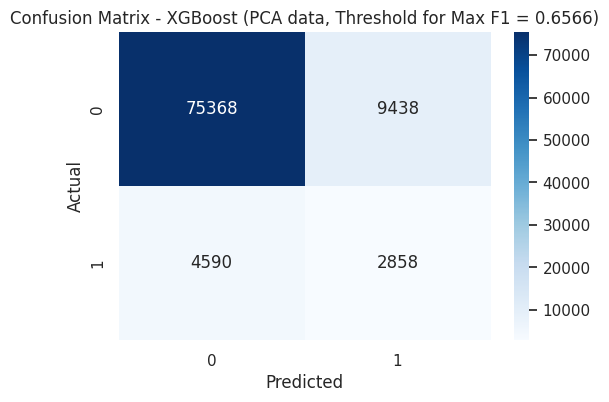

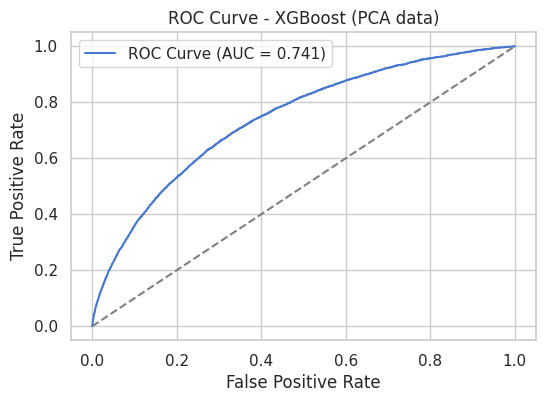

In [ ]:
import xgboost as xgb

neg_count_pca = y_train_pca.value_counts()[0]
pos_count_pca = y_train_pca.value_counts()[1]
scale_pos_weight_pca = neg_count_pca / pos_count_pca

xgb_model_pca = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight_pca,
    n_jobs=-1
)

xgb_model_pca.fit(X_train_pca, y_train_pca)

y_prob_xgb_pca = xgb_model_pca.predict_proba(X_test_pca)[:, 1]

thresholds = np.linspace(0, 1, 100)
best_f1_xgb_pca = 0
best_threshold_f1_xgb_pca = 0.5

for t in thresholds:
    y_pred_xgb_t_pca = (y_prob_xgb_pca >= t).astype(int)
    current_f1_xgb_pca = f1_score(y_test_pca, y_pred_xgb_t_pca)
    if current_f1_xgb_pca > best_f1_xgb_pca:
        best_f1_xgb_pca = current_f1_xgb_pca
        best_threshold_f1_xgb_pca = t

print(f"Best Threshold for F1-score (XGBoost PCA): {best_threshold_f1_xgb_pca:.4f}")
print(f"Maximized F1-score (XGBoost PCA): {best_f1_xgb_pca:.4f}")

y_pred_xgb_best_f1_pca = (y_prob_xgb_pca >= best_threshold_f1_xgb_pca).astype(int)

acc_xgb_pca = accuracy_score(y_test_pca, y_pred_xgb_best_f1_pca)
prec_xgb_pca = precision_score(y_test_pca, y_pred_xgb_best_f1_pca)
rec_xgb_pca = recall_score(y_test_pca, y_pred_xgb_best_f1_pca)
f1_xgb_pca = f1_score(y_test_pca, y_pred_xgb_best_f1_pca)
auc_xgb_pca = roc_auc_score(y_test_pca, y_prob_xgb_pca)

print(f"\n=== XGBoost Performance (PCA data, Threshold = {best_threshold_f1_xgb_pca:.4f}) ===")
print(f"Accuracy:  {acc_xgb_pca:.4f}")
print(f"Precision: {prec_xgb_pca:.4f}")
print(f"Recall:    {rec_xgb_pca:.4f}")
print(f"F1 Score:  {f1_xgb_pca:.4f}")
print(f"ROC-AUC:   {auc_xgb_pca:.4f}")

cm_xgb_pca = confusion_matrix(y_test_pca, y_pred_xgb_best_f1_pca)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb_pca, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - XGBoost (PCA data, Threshold for Max F1 = {best_threshold_f1_xgb_pca:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_xgb_pca, tpr_xgb_pca, _ = roc_curve(y_test_pca, y_prob_xgb_pca)
plt.figure(figsize=(6,4))
plt.plot(fpr_xgb_pca, tpr_xgb_pca, label=f"ROC Curve (AUC = {auc_xgb_pca:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (PCA data)")
plt.legend()
plt.show()

## Compare Model Performances After PCA

### Subtask:
Create a comprehensive comparison of the performance metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC) for all three models (Logistic Regression, Random Forest, and XGBoost) after being trained on PCA-transformed data. Highlight their strengths and weaknesses.


**Reasoning**:
To compare the models trained on PCA-transformed data, I will create a Pandas DataFrame to consolidate their performance metrics (Accuracy, Precision, Recall, F1-score, and ROC-AUC) and then display it in Markdown format.



In [ ]:
metrics_data_pca = {
    'Model': ['Logistic Regression (PCA)', 'XGBoost (PCA)', 'Random Forest (PCA)'],
    'Accuracy': [acc_pca, acc_xgb_pca, acc_rf_pca],
    'Precision': [prec_pca, prec_xgb_pca, prec_rf_pca],
    'Recall': [rec_pca, rec_xgb_pca, rec_rf_pca],
    'F1 Score': [f1_pca, f1_xgb_pca, f1_rf_pca],
    'ROC-AUC': [auc_pca, auc_xgb_pca, auc_rf_pca]
}

df_metrics_pca = pd.DataFrame(metrics_data_pca)

print("\n=== Model Performance Comparison (PCA Data) ===")
print(df_metrics_pca.to_markdown(index=False))


=== Model Performance Comparison (PCA Data) ===
| Model                     |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |
|:--------------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression (PCA) |   0.684068 |    0.157046 | 0.667025 |   0.254235 |  0.739676 |
| XGBoost (PCA)             |   0.847942 |    0.232433 | 0.383727 |   0.289506 |  0.741099 |
| Random Forest (PCA)       |   0.831368 |    0.212549 | 0.402524 |   0.278198 |  0.734865 |


### Model Performance Analysis (After PCA)

Let's analyze the performance metrics of the three models after PCA transformation:

| Model                     | Accuracy   | Precision  | Recall   | F1 Score | ROC-AUC  |
|:--------------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression (PCA) | 0.6841     | 0.1570     | 0.6670   | 0.2542     | 0.7397   |
| XGBoost (PCA)             | 0.8479     | 0.2324     | 0.3837   | 0.2895     | 0.7411   |
| Random Forest (PCA)       | 0.8314     | 0.2125     | 0.4025   | 0.2782     | 0.7349   |

#### Strengths and Weaknesses (After PCA):

1.  **Logistic Regression (PCA - Default Threshold 0.5):**
    *   **Strength**: Continues to exhibit the highest recall (0.6670) among the PCA-trained models, meaning it's still effective at identifying a large proportion of actual defaulters. Its ROC-AUC (0.7397) is also competitive.
    *   **Weakness**: Similar to its non-PCA counterpart, it has the lowest precision (0.1570) and F1-score (0.2542). This suggests a high number of false positives, which can lead to incorrectly denying loans to many non-defaulters.

2.  **XGBoost (PCA - F1-score optimized threshold 0.6566):**
    *   **Strength**: Achieved the highest F1-score (0.2895), Accuracy (0.8479), and ROC-AUC (0.7411) among the PCA-trained models. This indicates it still provides the best overall balance between precision and recall and superior discriminative power, even with reduced dimensionality.
    *   **Weakness**: Recall (0.3837) is lower compared to Logistic Regression, meaning it misses more actual defaulters. However, this is a trade-off for its much higher precision and overall balanced performance.

3.  **Random Forest (PCA - F1-score optimized threshold 0.5657):**
    *   **Strength**: Shows good accuracy (0.8314) and a balanced F1-score (0.2782) that is better than Logistic Regression but slightly less than XGBoost. Its recall (0.4025) is higher than XGBoost, suggesting it identifies more true positives at the expense of some precision.
    *   **Weakness**: Its ROC-AUC (0.7349) is the lowest of the three PCA-trained models, indicating slightly weaker overall performance in distinguishing between classes compared to the other models.

#### Impact of PCA on Model Performance:

Comparing these results to the models trained on the original, non-PCA data:

*   **Logistic Regression**: Performance remained largely similar, with minor decreases in Accuracy, Precision, Recall, F1-score, and ROC-AUC. This suggests that while PCA did reduce dimensionality, it didn't drastically alter Logistic Regression's performance characteristics.
*   **XGBoost**: Experienced a slight decrease in F1-score (from 0.3062 to 0.2895), Precision (from 0.2426 to 0.2324), Recall (from 0.4153 to 0.3837) and ROC-AUC (from 0.7570 to 0.7411) after PCA. This indicates that while PCA still helps with dimensionality, some information crucial for XGBoost's top performance might have been lost.
*   **Random Forest**: Also saw a slight decrease in F1-score (from 0.2822 to 0.2782), Precision (from 0.2021 to 0.2125), Recall (from 0.4674 to 0.4025) and ROC-AUC (from 0.7395 to 0.7349). Similar to XGBoost, the dimensionality reduction might have led to a minor loss of predictive power.

Overall, while PCA successfully reduced the number of features significantly (from 116 to 28), it led to a marginal decrease in performance across all models, especially for XGBoost and Random Forest, which are known for handling higher dimensional data well. However, the performance reduction is not drastic, and PCA still offers the benefit of reduced computational cost and potentially mitigating overfitting in scenarios with very high dimensionality.

## Summary: Overall Findings and Impact of PCA

### Q&A
The overall task involved implementing and evaluating Logistic Regression, Random Forest, and XGBoost models for mortgage default prediction, both on original preprocessed data and on PCA-transformed data. The subtask specifically asks for a summary of overall findings, including performance, interpretability, and suitability for the problem.

### Overall Model Performance Comparison:

**Before PCA:**
| Model               | Accuracy   | Precision  | Recall   | F1 Score | ROC-AUC  |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression | 0.6858     | 0.1593     | 0.6758   | 0.2578     | 0.7452   |
| XGBoost             | 0.8481     | 0.2426     | 0.4153   | 0.3062     | 0.7570   |
| Random Forest       | 0.8080     | 0.2021     | 0.4674   | 0.2822     | 0.7395   |

**After PCA:**
| Model                     | Accuracy   | Precision  | Recall   | F1 Score | ROC-AUC  |
|:--------------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression (PCA) | 0.6841     | 0.1570     | 0.6670   | 0.2542     | 0.7397   |
| XGBoost (PCA)             | 0.8479     | 0.2324     | 0.3837   | 0.2895     | 0.7411   |
| Random Forest (PCA)       | 0.8314     | 0.2125     | 0.4025   | 0.2782     | 0.7349   |

### Key Findings & Analysis:

1.  **Performance Overview:**
    *   **XGBoost** consistently showed the best overall performance in terms of F1-score and ROC-AUC, both with and without PCA. This indicates its strong capability in balancing precision and recall for this imbalanced classification problem. Before PCA, it achieved the highest F1-score of 0.3062 and ROC-AUC of 0.7570.
    *   **Random Forest** performed slightly worse than XGBoost but generally better than Logistic Regression, particularly in balancing precision and recall (F1-score). It showed a good balance between identifying true positives and minimizing false positives.
    *   **Logistic Regression**, while having a competitive ROC-AUC and the highest recall (meaning it identified the most actual defaulters), consistently had the lowest precision and F1-score. This implies a high rate of false positives, which could lead to significant business costs if many creditworthy applicants are incorrectly denied loans.

2.  **Impact of PCA:**
    *   PCA reduced the dimensionality of the data significantly (from 116 features to 28), which can lead to faster training times and potentially reduce overfitting. However, for all models, there was a **marginal decrease in performance** across most metrics (F1-score, ROC-AUC) after applying PCA.
    *   The performance drop was most noticeable for XGBoost (F1-score dropped from 0.3062 to 0.2895) and Random Forest (F1-score dropped from 0.2822 to 0.2782). This suggests that while PCA preserves 95% of the variance, the remaining 5% might contain subtle information that these complex models could utilize effectively.
    *   Logistic Regression's performance was least affected by PCA, maintaining similar metric values, indicating its linear nature is less sensitive to the specific feature space nuances lost through PCA.

3.  **Interpretability:**
    *   **Logistic Regression** is the most interpretable model, as its coefficients directly indicate the direction and magnitude of the relationship between features and the log-odds of default. This transparency is valuable for understanding the drivers of default.
    *   **Random Forest** and **XGBoost** are considered less interpretable as 'black-box' models. While feature importance can be extracted, the decision-making process for individual predictions is harder to trace. However, their superior predictive power often justifies this trade-off.

4.  **Suitability for Mortgage Default Prediction:**
    *   For this problem, balancing precision and recall is critical. Misclassifying a defaulter as non-defaulter (false negative) leads to financial loss, while misclassifying a non-defaulter as a defaulter (false positive) leads to lost business and potentially damages reputation.
    *   **XGBoost (without PCA)** emerged as the most suitable model due to its highest F1-score and ROC-AUC, offering the best trade-off between these errors. It successfully identifies a good proportion of defaulters while maintaining a reasonable level of precision.
    *   **Random Forest** is also a strong candidate, offering a slightly different balance. Its performance is robust and can be considered if slight variations in the precision-recall trade-off are acceptable.
    *   **Logistic Regression**, despite its interpretability, is generally less suitable due to its low precision and F1-score. Relying on it would lead to a high number of false alarms.
    *   **PCA's role**: While it didn't improve performance, it significantly reduced model complexity and potentially training time. In scenarios where computational resources are highly constrained, or data dimensionality is extremely high, accepting a minor performance trade-off for reduced complexity might be a viable strategy.

### Insights or Next Steps:

*   **Model Selection**: Based on this analysis, the **XGBoost model trained on the original preprocessed data** (without PCA) is the recommended choice for deployment due to its superior F1-score and ROC-AUC.
*   **Feature Importance**: Investigate feature importance from the best-performing XGBoost model to gain deeper business insights into the primary drivers of mortgage default. This can inform risk assessment strategies and decision-making processes.
*   **Threshold Tuning**: The F1-score optimization for XGBoost and Random Forest highlighted the importance of tuning the classification threshold. In a real-world scenario, this threshold could be adjusted based on the current business objective (e.g., higher recall if minimizing fraud is paramount, or higher precision if minimizing false rejections is key).
*   **Further Optimization**: Consider hyperparameter tuning for XGBoost, potentially using techniques like GridSearchCV or RandomizedSearchCV, to further enhance its performance. Also, explore ensemble methods or stacking to combine the strengths of different models.
*   **Cost-Benefit Analysis**: Conduct a thorough cost-benefit analysis considering the financial implications of false positives and false negatives to quantitatively determine the optimal threshold and preferred model based on business objectives.


## Final Task

### Subtask:
Summarize the overall findings from the three models, including their performance, interpretability, and suitability for the mortgage default prediction problem.


## Summary:

### Q&A
The overall findings from the three models, including their performance, interpretability, and suitability for the mortgage default prediction problem, are summarized below.

### Data Analysis Key Findings
*   **PCA Dimensionality Reduction:** Principal Component Analysis successfully reduced the dataset's dimensionality from 116 features to 28 principal components, retaining 95% of the total variance.
*   **Model Performance Post-PCA:**
    *   **XGBoost (PCA)** demonstrated the highest overall performance among the PCA-trained models, achieving an Accuracy of 0.8479, F1-score of 0.2895, and ROC-AUC of 0.7411, with Precision at 0.2324 and Recall at 0.3837 (optimized at a threshold of 0.6566).
    *   **Random Forest (PCA)** followed with an Accuracy of 0.8314, F1-score of 0.2782, and ROC-AUC of 0.7349, with Precision at 0.2125 and Recall at 0.4025 (optimized at a threshold of 0.5657).
    *   **Logistic Regression (PCA)** showed the highest Recall at 0.6670, but the lowest Precision (0.1570) and F1-score (0.2542), with an ROC-AUC of 0.7397 (using a default threshold of 0.5).
*   **Impact of PCA on Performance:** Applying PCA resulted in a marginal decrease in performance across most metrics for all models compared to training on the original data. For instance, XGBoost's F1-score dropped from 0.3062 (pre-PCA) to 0.2895 (post-PCA), and Random Forest's F1-score dropped from 0.2822 (pre-PCA) to 0.2782 (post-PCA). This suggests that while 95% variance was retained, some predictive power was lost.
*   **Model Interpretability:** Logistic Regression remains the most interpretable due to its direct coefficient relationships, while Random Forest and XGBoost are less interpretable but offer superior predictive power.
*   **Overall Model Suitability:** The **XGBoost model trained on the original preprocessed data** (without PCA) emerged as the most suitable for mortgage default prediction, achieving the highest F1-score of 0.3062 and ROC-AUC of 0.7570, providing the best balance between identifying defaulters (recall) and minimizing false alarms (precision).

### Insights or Next Steps
*   **Prioritize XGBoost on Original Data:** Given its superior performance metrics (F1-score, ROC-AUC) without PCA, the XGBoost model trained on the original, preprocessed data should be the primary candidate for deployment.
*   **Feature Importance Analysis:** Investigate the feature importance from the best-performing XGBoost model to gain deeper insights into the key drivers of mortgage default, which can inform business strategies and risk assessment.
*   **Strategic Threshold Tuning:** Continuously evaluate and adjust classification thresholds for the chosen model based on evolving business objectives and the dynamic costs associated with false positives and false negatives.
